In [1]:
import pandas as pd
import pyodbc
import datetime
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

import sklearn.linear_model
from sklearn.linear_model import LinearRegression,ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV,ElasticNetCV
from sklearn.linear_model import HuberRegressor,RANSACRegressor,TheilSenRegressor

import xgboost as xgb
from xgboost import plot_importance,XGBClassifier,XGBRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict,StratifiedKFold

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import sklearn.metrics
from sklearn.metrics import roc_curve, auc, r2_score

from sklearn.ensemble import RandomForestClassifier

from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
from sklearn.model_selection import train_test_split
import json
import requests

In [2]:
hdb = pd.read_csv("hdb_2018_19_final_with_planning_area.csv")

In [3]:
hdb.isnull().sum()

Unnamed: 0                          0
Unnamed: 0.1                        0
Unnamed: 0.1.1                      0
town                                0
flat_type                           0
flat_model                          0
floor_area_sqm                      0
street_name                         0
resale_price                        0
month                               0
remaining_lease                     0
lease_commence_date                 0
storey_range                        0
_id                                 0
block                               0
year                                0
address                             0
ADD_SEQ                             0
ADDRESS                             0
BLK_NO                              0
BUILDING                            0
LATITUDE                            0
LONGITUDE                           0
LONGTITUDE                          0
POSTAL                              0
ROAD_NAME                           0
SEARCHVAL   

In [4]:
hdb[hdb['year'] == 2018].shape, hdb[hdb['year'] == 2019].shape, hdb.shape

((21549, 39), (2869, 39), (24418, 39))

In [5]:
hdb_2018 = hdb[hdb['year'] == 2018].reset_index()
hdb_2019 = hdb[hdb['year'] == 2019].reset_index()

hdb_2018.shape,hdb_2019.shape

((21549, 40), (2869, 40))

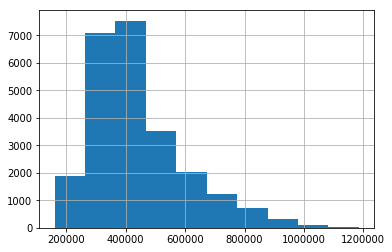

In [6]:
hdb['resale_price'].hist()

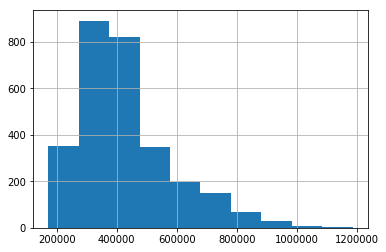

In [7]:
hdb_2019['resale_price'].hist()

In [8]:
hdb.describe()

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,floor_area_sqm,resale_price,remaining_lease,lease_commence_date,_id,year,ADD_SEQ,...,LONGTITUDE,POSTAL,X,Y,1,nearest_stn_latitude,nearest_stn_longitude,nearest_station_walking_time,nearest_station_walking_distance,num_top_pschool_2km
count,24418.000000,24418.000000,24418.000000,24418.000000,2.441800e+04,24418.000000,24418.000000,24418.000000,24418.000000,24418.0,...,24418.000000,24418.000000,24418.000000,24418.000000,24418.0,24418.000000,24418.000000,24418.000000,24418.000000,24418.000000
mean,12208.500000,12208.500000,12208.500000,98.271390,4.397543e+05,74.001802,1993.540175,69727.979892,2018.117495,0.0,...,103.838083,561171.764764,28530.271418,38826.307806,1.0,1.366995,103.838083,768.141822,1066.547342,0.405766
std,7049.013773,7049.013773,7049.013773,24.425073,1.574784e+05,12.265232,12.236069,7057.587566,0.322016,0.0,...,0.071857,191344.514221,7996.855253,4769.135527,0.0,0.042933,0.071846,403.175979,560.013810,0.498500
min,0.000000,0.000000,0.000000,31.000000,1.600000e+05,46.000000,1966.000000,57505.000000,2018.000000,0.0,...,103.685228,50004.000000,11519.146490,28097.635140,1.0,1.265473,103.697359,0.000000,0.000000,0.000000
25%,6104.250000,6104.250000,6104.250000,82.000000,3.255970e+05,65.000000,1984.000000,63614.250000,2018.000000,0.0,...,103.774922,510223.000000,21501.293760,35468.110445,1.0,1.337587,103.774090,476.000000,661.000000,0.000000
50%,12208.500000,12208.500000,12208.500000,97.000000,4.050000e+05,74.000000,1993.000000,69727.500000,2018.000000,0.0,...,103.844384,563310.000000,29231.419230,38698.825450,1.0,1.369370,103.845861,693.000000,962.000000,0.000000
75%,18312.750000,18312.750000,18312.750000,113.000000,5.150000e+05,83.000000,2002.000000,75840.750000,2018.000000,0.0,...,103.898911,730150.000000,35299.858280,41872.676930,1.0,1.397535,103.895466,965.750000,1341.000000,1.000000
max,24417.000000,24417.000000,24417.000000,237.000000,1.185000e+06,96.000000,2016.000000,81950.000000,2019.000000,0.0,...,103.987804,825195.000000,45192.299290,48695.325470,1.0,1.449051,103.988321,2448.000000,3401.000000,2.000000


In [9]:
hdb.groupby("flat_model").agg({"_id":"size","resale_price":"mean"})

,_id,resale_price
flat_model,,
Adjoined flat,49,7.080521e+05
Apartment,1071,6.154261e+05
DBSS,360,8.070720e+05
Improved,6179,4.484672e+05
Improved-Maisonette,6,6.800000e+05
Maisonette,766,6.761195e+05
Model A,7797,4.223118e+05
Model A-Maisonette,35,7.414450e+05
Model A2,378,3.410498e+05


In [10]:
hdb.groupby("planning_area").agg({"_id":"size","resale_price":"mean"})

,_id,resale_price
planning_area,,
ANG MO KIO,1147,422129.586748
BEDOK,1307,413958.153787
BISHAN,472,638897.190678
BUKIT BATOK,969,378618.193756
BUKIT MERAH,979,567337.004086
BUKIT PANJANG,863,427060.066049
BUKIT TIMAH,47,796750.042553
CHANGI,2,287500.000000
CHOA CHU KANG,1069,380958.407858


In [11]:
hdb.groupby("flat_type").agg({"_id":"size","resale_price":"mean"})

,_id,resale_price
flat_type,,
1 ROOM,12,182833.333333
2 ROOM,333,235102.762763
3 ROOM,5835,305035.102656
4 ROOM,9962,430835.843983
5 ROOM,6170,527633.545543
EXECUTIVE,2090,630244.179306
MULTI-GENERATION,16,803805.500000


In [12]:
hdb.columns

Index(['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'town', 'flat_type',
       'flat_model', 'floor_area_sqm', 'street_name', 'resale_price', 'month',
       'remaining_lease', 'lease_commence_date', 'storey_range', '_id',
       'block', 'year', 'address', 'ADD_SEQ', 'ADDRESS', 'BLK_NO', 'BUILDING',
       'LATITUDE', 'LONGITUDE', 'LONGTITUDE', 'POSTAL', 'ROAD_NAME',
       'SEARCHVAL', 'X', 'Y', '1', 'nearest_stn', 'nearest_stn_distance',
       'nearest_stn_2', 'nearest_stn_latitude', 'nearest_stn_longitude',
       'nearest_station_walking_time', 'nearest_station_walking_distance',
       'planning_area', 'num_top_pschool_2km'],
      dtype='object')

In [13]:
hdb[hdb['flat_type'] =='MULTI-GENERATION']

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,town,flat_type,flat_model,floor_area_sqm,street_name,resale_price,month,...,1,nearest_stn,nearest_stn_distance,nearest_stn_2,nearest_stn_latitude,nearest_stn_longitude,nearest_station_walking_time,nearest_station_walking_distance,planning_area,num_top_pschool_2km
5968,5968,5968,5968,YISHUN,MULTI-GENERATION,Multi Generation,164.0,YISHUN AVE 4,728888.0,2018-04,...,1,KHATIB MRT STATION,0.8140334504842007 km,KHATIB MRT STATION,1.417383,103.83298,755,1049,YISHUN,0.0
7440,7440,7440,7440,TAMPINES,MULTI-GENERATION,Multi Generation,166.0,TAMPINES ST 42,850000.0,2018-05,...,1,TAMPINES EAST MRT STATION,0.2373854406458289 km,TAMPINES EAST MRT STATION,1.356191,103.95460,238,330,TAMPINES,0.0
9690,9690,9690,9690,YISHUN,MULTI-GENERATION,Multi Generation,164.0,YISHUN AVE 4,765000.0,2018-06,...,1,KHATIB MRT STATION,0.8140334504842007 km,KHATIB MRT STATION,1.417383,103.83298,755,1049,YISHUN,0.0
12213,12213,12213,12213,YISHUN,MULTI-GENERATION,Multi Generation,164.0,YISHUN AVE 4,770000.0,2018-07,...,1,KHATIB MRT STATION,0.8140334504842007 km,KHATIB MRT STATION,1.417383,103.83298,755,1049,YISHUN,0.0
13914,13914,13914,13914,TAMPINES,MULTI-GENERATION,Multi Generation,166.0,TAMPINES ST 42,828000.0,2018-08,...,1,TAMPINES EAST MRT STATION,0.2373854406458289 km,TAMPINES EAST MRT STATION,1.356191,103.95460,238,330,TAMPINES,0.0
14280,14280,14280,14280,YISHUN,MULTI-GENERATION,Multi Generation,171.0,YISHUN ST 61,778000.0,2018-08,...,1,KHATIB MRT STATION,0.776542004256408 km,KHATIB MRT STATION,1.417383,103.83298,672,934,YISHUN,0.0
16260,16260,16260,16260,YISHUN,MULTI-GENERATION,Multi Generation,179.0,YISHUN AVE 4,780000.0,2018-09,...,1,KHATIB MRT STATION,0.8140334504842007 km,KHATIB MRT STATION,1.417383,103.83298,362,502,YISHUN,0.0
16262,16262,16262,16262,YISHUN,MULTI-GENERATION,Multi Generation,179.0,YISHUN AVE 4,825000.0,2018-09,...,1,KHATIB MRT STATION,0.8140334504842007 km,KHATIB MRT STATION,1.417383,103.83298,936,1299,YISHUN,0.0
17858,17858,17858,17858,TAMPINES,MULTI-GENERATION,Multi Generation,132.0,TAMPINES ST 42,778000.0,2018-10,...,1,TAMPINES EAST MRT STATION,0.2373854406458289 km,TAMPINES EAST MRT STATION,1.356191,103.95460,348,484,TAMPINES,0.0
17859,17859,17859,17859,TAMPINES,MULTI-GENERATION,Multi Generation,166.0,TAMPINES ST 42,990000.0,2018-10,...,1,TAMPINES EAST MRT STATION,0.2373854406458289 km,TAMPINES EAST MRT STATION,1.356191,103.95460,713,989,TAMPINES,0.0


# Listings

In [14]:
# cleaning listings data
listings = pd.read_csv("listings_final_with_walking_distance.csv")
listings.shape

(9909, 37)

In [15]:
listings.columns

Index(['Unnamed: 0', 'address', 'url', 'beds', 'baths', 'area', 'price_psf',
       'subline', 'nearest_mrt', 'amenities', 'description', 'year_completion',
       'price', 'furnishing', 'remaining_lease', 'Unnamed: 0.1', 'index',
       'ADDRESS', 'BLK_NO', 'BUILDING', 'LATITUDE', 'LONGITUDE', 'LONGTITUDE',
       'POSTAL', 'ROAD_NAME', 'SEARCHVAL', 'X', 'Y', 'nearest_stn',
       'nearest_stn_distance', 'STN_NAME_CLEAN', 'nearest_stn_latitude',
       'nearest_stn_longitude', 'nearest_station_walking_time',
       'nearest_station_walking_distance', 'town', 'num_top_pschool_2km'],
      dtype='object')

In [16]:
listings.columns = ['Unnamed: 0', 'address', 'url', 'beds', 'baths', 'floor_area_sqm', 'price_psf',
       'subline', 'nearest_mrt', 'amenities', 'description', 'year_completion',
       'price', 'furnishing', 'remaining_lease', 'Unnamed: 0.1', 'index',
       'ADDRESS', 'BLK_NO', 'BUILDING', 'LATITUDE', 'LONGITUDE', 'LONGTITUDE',
       'POSTAL', 'ROAD_NAME', 'SEARCHVAL', 'X', 'Y', 'nearest_stn',
       'nearest_stn_distance', 'STN_NAME_CLEAN', 'nearest_stn_latitude',
       'nearest_stn_longitude', 'nearest_station_walking_time',
       'nearest_station_walking_distance', 'planning_area','num_top_pschool_2km']

In [17]:
# drop listing with no year of completion
listings = listings.dropna(subset=['remaining_lease', 'nearest_station_walking_time']).reset_index(drop=True)
listings.isnull().sum()

Unnamed: 0                            0
address                               0
url                                   0
beds                                  0
baths                               984
floor_area_sqm                        0
price_psf                             0
subline                             891
nearest_mrt                           0
amenities                             0
description                         415
year_completion                       0
price                                 0
furnishing                            0
remaining_lease                       0
Unnamed: 0.1                          0
index                                 0
ADDRESS                               0
BLK_NO                                0
BUILDING                              0
LATITUDE                              0
LONGITUDE                             0
LONGTITUDE                            0
POSTAL                                0
ROAD_NAME                             0


In [18]:
listings.shape

(9069, 37)

In [35]:
len(set(listings['address'].apply(lambda x:x.lower()).unique()) - set(hdb['address'].apply(lambda x:x.lower()).unique()))

3569

In [36]:
set(listings['address'].apply(lambda x:x.lower()).unique()) - set(hdb['address'].apply(lambda x:x.lower()).unique())

{'376 clementi avenue 4',
 '521 woodlands drive 14',
 '303 jurong east street 32',
 '9 pine close',
 '25 chai chee road',
 '18 tiong bahru road',
 '523 serangoon north avenue 4',
 '720 bedok reservoir road',
 '389 yishun avenue 6',
 '48 telok blangah drive',
 '603a punggol road',
 '486c tampines avenue 9',
 '21 joo seng road',
 '337d tah ching road',
 '111 lorong 1 toa payoh',
 '251 hougang avenue 3',
 '81b lorong 4 toa payoh',
 '690 jurong west central 1',
 '291d compassvale street',
 '129 ang mo kio avenue 3',
 '132 lorong ah soo',
 '818 woodlands street 82',
 '256 kim keat avenue',
 '215 serangoon avenue 4',
 '673c jurong west street 65',
 '86 whampoa drive',
 '212a compassvale drive',
 '182 bukit batok west avenue 8',
 '220 tampines street 24',
 '979a buangkok crescent',
 '177 woodlands street 13',
 '774 woodlands crescent',
 '641 bedok reservoir road',
 '407a fernvale road',
 '437 woodlands street 41',
 '168 petir road',
 '459 jurong west street 41',
 '323 ang mo kio avenue 3',
 '

In [43]:
hdb['address'].apply(lambda x:x.lower()).isin(["376 clementi avenue 4"])

0        False
1        False
2        False
3        False
4        False
5        False
6        False
7        False
8        False
9        False
10       False
11       False
12       False
13       False
14       False
15       False
16       False
17       False
18       False
19       False
20       False
21       False
22       False
23       False
24       False
25       False
26       False
27       False
28       False
29       False
         ...  
24388    False
24389    False
24390    False
24391    False
24392    False
24393    False
24394    False
24395    False
24396    False
24397    False
24398    False
24399    False
24400    False
24401    False
24402    False
24403    False
24404    False
24405    False
24406    False
24407    False
24408    False
24409    False
24410    False
24411    False
24412    False
24413    False
24414    False
24415    False
24416    False
24417    False
Name: address, Length: 24418, dtype: bool

In [68]:
# have to go back and change how remaining_lease is calculated --> it's wrong
# for now change it here first, but when organizing the code, remember to change it at the source cleaning code and delete this cell from this part

listings['remaining_lease'] = 99 - listings['remaining_lease']

In [69]:
listings['price'] = [np.int(val.replace("S$","").replace(",","")) for val in listings['price']]

In [70]:
# clean up area because some of the sqft is actually sqm
# 1sqm = 10.764sqft
# if [Beds]='2 Beds' then 52
# elseif [Beds]='3 Beds' then 70
# elseif [Beds]='4 Beds' then 104
# elseif [Beds]='1 Bed' then 31
# end

area_recal = []
for index,val in enumerate(listings['floor_area_sqm']):
    if ((listings.loc[index,'beds'] == '2 Beds') & (val <= 52)) |\
        ((listings.loc[index,'beds'] == '3 Beds') & (val <= 70)) |\
        ((listings.loc[index,'beds'] == '4 Beds') & (val <= 104)) |\
        ((listings.loc[index,'beds'] == '5 Beds') & (val <= 104)) |\
        ((listings.loc[index,'beds'] == '1 Bed') & (val <= 31)) :
        area_recal.append(val*10.764)
    else:
        area_recal.append(val)

len(area_recal), listings.shape

(9069, (9069, 37))

In [71]:
listings['floor_area_sqm'] = area_recal

In [72]:
listings['floor_area_sqm'].describe()

count    9.069000e+03
mean     1.104288e+04
std      1.029543e+06
min      3.102936e+01
25%      8.296172e+01
50%      1.039576e+02
75%      1.219807e+02
max      9.804074e+07
Name: floor_area_sqm, dtype: float64

In [73]:
listings['floor_area_sqm'].quantile(q=0.75) + 1.5* (listings['floor_area_sqm'].quantile(q=0.75) - listings['floor_area_sqm'].quantile(q=0.25) )

180.50910442214797

In [74]:
# exclude listings with floor area outlier
IQR = listings['floor_area_sqm'].quantile(q=0.75) - listings['floor_area_sqm'].quantile(q=0.25) 
listings = listings[listings['floor_area_sqm'] <= listings['floor_area_sqm'].quantile(q=0.75) + 1.5*IQR].reset_index(drop=True)


In [75]:
# exclude listings with price outlier
# exclude listings with floor area outlier
# IQR_price = listings['price'].quantile(q=0.75) - listings['price'].quantile(q=0.25) 
# listings = listings[listings['price'] <= listings['price'].quantile(q=0.75) + 1.5*IQR].reset_index(drop=True)
listings = listings[listings['price'] <= 1200000].reset_index(drop=True)


In [76]:
listings.shape

(8694, 37)

In [77]:
len(listings['planning_area'].unique())

30

# Price Prediction

### Data Pre-processing

1. features = ['town', 'flat_type', 'flat_model', 'floor_area_sqm',
        'remaining_lease','storey_range','nearest_station_walking_time']

In [78]:
features = ['planning_area', 'floor_area_sqm',
        'remaining_lease','nearest_stn','nearest_station_walking_time','num_top_pschool_2km']
# ,'storey_range', 'flat_model', 'flat_type','town'
y_2018 = np.log(hdb_2018['resale_price'])
y_2019 = np.log(hdb_2019['resale_price'])
y = np.log(hdb['resale_price'])

features_cat = list(hdb[features].select_dtypes(include=['object']).columns)
features_num = [col for col in hdb[features].columns if col not in features_cat]

#### Training: HDB's Transactions

In [79]:
# 2018 and 2019 combined (14 months data)

Xd = pd.get_dummies(hdb[features_cat])
ss = StandardScaler()
Xs = pd.DataFrame(ss.fit_transform(hdb[features_num]))
Xs.columns = features_num
X = Xs.merge(Xd.reset_index()
           ,how='left',left_on = None
           , right_on = None
           , left_index = True
           , right_index = True)
X.drop(columns="index",inplace=True)
X.head()

C:\Users\swoo\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:625: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\swoo\Anaconda3\lib\site-packages\sklearn\base.py:462: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


,floor_area_sqm,remaining_lease,nearest_station_walking_time,num_top_pschool_2km,planning_area_ANG MO KIO,planning_area_BEDOK,planning_area_BISHAN,planning_area_BUKIT BATOK,planning_area_BUKIT MERAH,planning_area_BUKIT PANJANG,...,nearest_stn_TELOK BLANGAH MRT STATION,nearest_stn_TIONG BAHRU MRT STATION,nearest_stn_TOA PAYOH MRT STATION,nearest_stn_UBI MRT STATION,nearest_stn_UPPER CHANGI MRT STATION,nearest_stn_WOODLANDS MRT STATION,nearest_stn_WOODLEIGH MRT STATION,nearest_stn_YEW TEE MRT STATION,nearest_stn_YIO CHU KANG MRT STATION,nearest_stn_YISHUN MRT STATION
0,-2.222000,-1.223141,-1.084268,1.192069,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-1.034671,-1.304674,-0.355043,1.192069,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-1.034671,-1.304674,-0.355043,1.192069,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-1.239383,-0.978542,0.113745,-0.813992,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,-1.239383,-0.978542,0.113745,-0.813992,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [80]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, y_train.shape,X_test.shape,y_test.shape)

(16360, 122) (16360,) (8058, 122) (8058,)


In [81]:
# import pickle
# scalerfile = 'scaler.sav'
# pickle.dump(ss, open(scalerfile, 'wb'))

# scaler = pickle.load(open(scalerfile, 'rb'))
# scaler.transform(X_test)

# # to save the columns
# featurescolumn = 'featurecolumn.sav'
# pickle.dump(X_train.columns,open(featurescolumn,'wb'))

# # to load the columns
# featurescol = pickle.load(open('C:/Users/swoo/Dropbox/DSI/Capstone/featurecolumn.sav','rb'))
# featurescol

In [82]:
# import datetime
# todays_date = datetime.datetime.now().date()
# index = pd.date_range(todays_date-datetime.timedelta(1), periods=1, freq='D')
# df = pd.DataFrame(index = index,columns=featurescol)
# df = df.fillna(0)
# df

In [83]:
# a = 'ANG MO KIO'
# planning_area_col = 'planning_area_'+ np.str(a)
# df[planning_area_col] = 1

# b = 100
# df["floor_area_sqm"] = b

# c = 60
# df["remaing_lease"] = c

# d = "HOUGANG"
# nearest_station_col = 'nearest_stn_'+d
# df[nearest_station_col] = 1

# e = 5
# df['nearest_station_walking_time'] = e

# df

In [84]:
# featuresnum = ['floor_area_sqm', 'remaining_lease', 'nearest_station_walking_time',
#        'num_top_pschool_2km']
# other_columns = [col for col in featurescol if col not in featuresnum]
# Xs = pd.DataFrame(scaler.transform(df[featuresnum]),index=df.index)
# Xs.columns = featuresnum
# X = Xs.merge(df[other_columns],how='left',left_on=None,right_on=None,left_index=True,right_index=True)
# X = X[featurescol]

# X

In [85]:
# np.exp(ridge_model.predict(X))

#### Test Data: 99.co Listings

In [86]:
# 99.co
Xd_listings = pd.get_dummies(listings[features_cat])
Xs_listings = pd.DataFrame(ss.transform(listings[features_num]))
Xs_listings.columns = features_num
X_listings = Xs_listings.merge(Xd_listings
           ,how='left',left_on = None
           , right_on = None
           , left_index = True
           , right_index = True)

X_listings.head()

,floor_area_sqm,remaining_lease,nearest_station_walking_time,num_top_pschool_2km,planning_area_ANG MO KIO,planning_area_BEDOK,planning_area_BISHAN,planning_area_BUKIT BATOK,planning_area_BUKIT MERAH,planning_area_BUKIT PANJANG,...,nearest_stn_UBI MRT STATION,nearest_stn_UPPER CHANGI MRT STATION,nearest_stn_UPPER THOMSON MRT STATION,nearest_stn_WOODLANDS MRT STATION,nearest_stn_WOODLANDS NORTH MRT STATION,nearest_stn_WOODLANDS SOUTH MRT STATION,nearest_stn_WOODLEIGH MRT STATION,nearest_stn_YEW TEE MRT STATION,nearest_stn_YIO CHU KANG MRT STATION,nearest_stn_YISHUN MRT STATION
0,-1.281040,-1.467740,-0.245907,-0.813992,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.668654,-1.467740,-0.141732,-0.813992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.668654,-1.386207,-0.501384,-0.813992,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1.465188,-0.978542,0.679266,-0.813992,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1.541260,-1.956938,0.133588,1.192069,0,0,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [87]:
X_listings.shape

(8694, 132)

In [88]:
# matching columns between 2 dataset
## columns that are in test but not in train
missing_test_columns = set(X_listings.columns) - set(X.columns)
X_listings.drop(columns = missing_test_columns,inplace=True)

print(set(X_listings.columns) - set(X.columns))

set()


In [89]:
for col in list(set(X.columns) - set(X_listings.columns)):
    X_listings[col] = 0


In [90]:
print(set(X.columns) - set(X_listings.columns))


set()


In [91]:
X_listings = X_listings[X.columns]


In [92]:
X.shape, X_listings.shape, listings['price'].shape

((24418, 122), (8694, 122), (8694,))

### Modelling

#### 1. Lasso Regression

In [93]:
lasso = LassoCV(cv=5)
lasso.fit(X_train,y_train)
lasso_scores = cross_val_score(lasso,X_train,y_train,cv=10)
print(lasso_scores)
print(np.mean(lasso_scores))

[0.89147223 0.88680981 0.88571199 0.88866437 0.88420883 0.8858565
 0.88816662 0.89195599 0.8960848  0.88332666]
0.8882257789296798


In [94]:
sklearn.metrics.r2_score(y_test,lasso.predict(X_test))

0.8893782804370589

In [95]:
listings['lasso_predictions'] = np.exp(lasso.predict(X_listings))

In [96]:
# print(sklearn.metrics.r2_score(listings['price'],listings['lasso_predictions']))
print(sklearn.metrics.r2_score(listings['price'],listings['lasso_predictions']))

0.7376913386020543


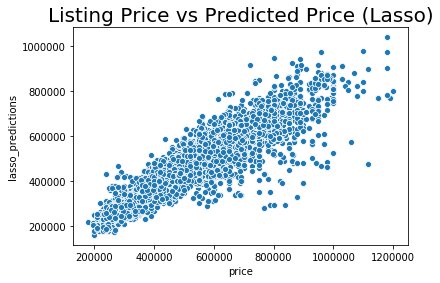

In [97]:
sns.scatterplot(listings['price'],listings['lasso_predictions'])
plt.title('Listing Price vs Predicted Price (Lasso)',fontsize=20);

In [98]:
lasso_coefs = pd.DataFrame({'variable':X.columns,'coef':lasso.coef_,'abs_coef':np.abs(lasso.coef_)})
lasso_coefs[lasso_coefs['abs_coef']>0].sort_values('abs_coef',ascending=False).head(20)

,variable,coef,abs_coef
20,planning_area_MARINE PARADE,0.425153,0.425153
22,planning_area_OUTRAM,0.369506,0.369506
12,planning_area_CHOA CHU KANG,-0.366906,0.366906
33,planning_area_WOODLANDS,-0.338002,0.338002
27,planning_area_SEMBAWANG,-0.335135,0.335135
25,planning_area_QUEENSTOWN,0.268838,0.268838
0,floor_area_sqm,0.250946,0.250946
9,planning_area_BUKIT PANJANG,-0.239741,0.239741
98,nearest_stn_PUNGGOL MRT STATION,-0.234869,0.234869
18,planning_area_JURONG WEST,-0.222935,0.222935


#### 2. Ridge Regression

In [99]:
ridge_alphas = np.logspace(-2, 7, 50)
ridge = RidgeCV(alphas=ridge_alphas, cv=10)
ridge_scores = cross_val_score(ridge, X_train,y_train,cv=10)
ridge.fit(X_train,np.ravel(y_train))
print(ridge_scores)
print(np.mean(ridge_scores))
print(ridge.alpha_)

[0.89668626 0.89239684 0.89169959 0.89242161 0.89259496 0.89092825
 0.89326591 0.8945588  0.89835889 0.89047672]
0.8933387817711687
0.054286754393238594


In [100]:
# print(sklearn.metrics.r2_score(listings['price'],listings['lasso_predictions']))

print(sklearn.metrics.r2_score(y_test,ridge.predict(X_test)))

listings['ridge_predictions'] = np.exp(ridge.predict(X_listings))
print(sklearn.metrics.r2_score(listings['price'],listings['ridge_predictions']))

0.8960209922102538
0.7464591257022659


#### HDB - Comparing Ridge's predictions against Actual Resale Price

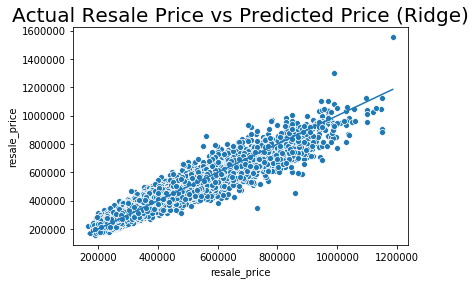

In [101]:
lasso_predictions = lasso.predict(X_test)
ridge_predictions = ridge.predict(X_test)

sns.scatterplot(np.exp(y_test),np.exp(ridge_predictions))
sns.lineplot(np.exp(y_test),np.exp(y_test))
plt.title('Actual Resale Price vs Predicted Price (Ridge)',fontsize=20);

#### Residual Plot

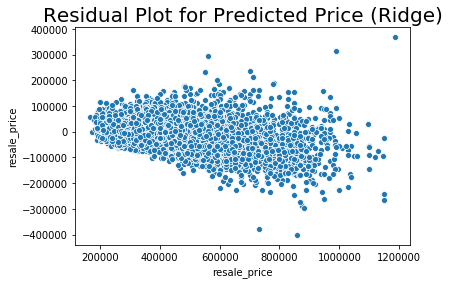

In [102]:
residual = np.exp(ridge_predictions) - np.exp(y_test)
sns.scatterplot(np.exp(y_test),residual)
plt.title('Residual Plot for Predicted Price (Ridge)',fontsize=20);

In [103]:
listings['ridge_predictions'] = np.exp(ridge.predict(X_listings))
listings[listings['ridge_predictions'].isna()]

,Unnamed: 0,address,url,beds,baths,floor_area_sqm,price_psf,subline,nearest_mrt,amenities,...,nearest_stn_distance,STN_NAME_CLEAN,nearest_stn_latitude,nearest_stn_longitude,nearest_station_walking_time,nearest_station_walking_distance,planning_area,num_top_pschool_2km,lasso_predictions,ridge_predictions


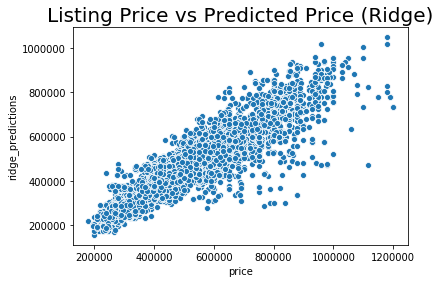

In [104]:
sns.scatterplot(listings['price'],listings['ridge_predictions'])
plt.title('Listing Price vs Predicted Price (Ridge)',fontsize=20);

In [105]:
ridge_coefs = pd.DataFrame({'variable':X.columns,'coef':ridge.coef_,'abs_coef':np.abs(ridge.coef_)})
ridge_coefs[ridge_coefs['abs_coef']>0].sort_values('abs_coef',ascending=False).head(20)

,variable,coef,abs_coef
20,planning_area_MARINE PARADE,0.518832,0.518832
51,nearest_stn_BUGIS MRT STATION,0.481720,0.481720
43,nearest_stn_BENCOOLEN MRT STATION,0.409775,0.409775
76,nearest_stn_KAKI BUKIT MRT STATION,-0.328243,0.328243
98,nearest_stn_PUNGGOL MRT STATION,-0.318515,0.318515
33,planning_area_WOODLANDS,-0.312535,0.312535
84,nearest_stn_LITTLE INDIA MRT STATION,0.293199,0.293199
12,planning_area_CHOA CHU KANG,-0.280578,0.280578
41,nearest_stn_BEDOK NORTH MRT STATION,-0.258794,0.258794
103,nearest_stn_SENGKANG MRT STATION,-0.254584,0.254584


## Advanced Ensemble - Boosting

#### 3. XGBoost Regressor without gridsearch

In [53]:
xg_reg = XGBRegressor(base_score=0.8, booster='gbtree', colsample_bylevel=0.3,
       colsample_bytree=0.5, gamma=0, importance_type='gain',
       learning_rate=0.1, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=200, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

xg_reg_scores = cross_val_score(xg_reg, X_train,y_train,cv=5)
xg_reg.fit(X_train,np.ravel(y_train))
print(xg_reg_scores)
print(np.mean(xg_reg_scores))


C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0.93551914 0.93081805 0.93117762 0.93248043 0.93345537]
0.9326901210246685


In [54]:
print("R2 Score for XGRegressor on y_test = ",sklearn.metrics.r2_score(y_test,xg_reg.predict(X_test)))

listings['xgreg_predictions'] = np.exp(xg_reg.predict(X_listings))
print("R2 Score for XGRegressor on listings = ",sklearn.metrics.r2_score(listings['price'],listings['xgreg_predictions']))

R2 Score for XGRegressor on y_test =  0.9371308873171824
R2 Score for XGRegressor on listings =  0.8178895543030302


#### 3. XGBoost Regressor with gridsearch

{'base_score': 0.89, 'booster': 'gbtree', 'colsample_bylevel': 0.7, 'colsample_bytree': 0.3, 'learning_rate': 0.2, 'max_depth': 9, 'n_estimators': 500}
0.9329853267481549
XGBRegressor(base_score=0.89, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.2, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)
--- 5421.972745895386 seconds ---

In [55]:
# #Try GridSearch on XGBoost regressor

# from xgboost.sklearn import XGBRegressor
# xg_reg_gs = XGBRegressor()

# import time
# start_time = time.time()

# from sklearn.model_selection import GridSearchCV

# param_grid = {'base_score':[0.89],
#               'max_depth': [5,7,9],
# #               'reg_alpha': [0,0.5,1],
# #               'reg_lambda': [0,0.5,1],
# #               'min_child_weight': [1, 5, 10],
#               'learning_rate':[0.1,0.2,0.3],
#               'colsample_bytree':[0.3,0.5,0.7],
#               'colsample_bylevel':[0.3,0.5,0.7],
#               'booster':['gbtree'],
#               'n_estimators' : [100,200,500]
#              }

# grid = GridSearchCV(xg_reg_gs, param_grid, cv=3, n_jobs=-1,scoring='r2')
# grid.fit(X,y)

# print(grid.best_params_)
# print(grid.best_score_)
# print(grid.best_estimator_)
# print("--- %s seconds ---" % (time.time() - start_time))

In [106]:
xg_reg = XGBRegressor(base_score=0.89, booster='gbtree', colsample_bylevel=0.7,
       colsample_bytree=0.3, gamma=0, importance_type='gain',
       learning_rate=0.2, max_delta_step=0, max_depth=9,
       min_child_weight=1, missing=None, n_estimators=500, n_jobs=1,
       nthread=None, objective='reg:linear', random_state=0, reg_alpha=0,
       reg_lambda=1, scale_pos_weight=1, seed=None, silent=True,
       subsample=1)

xg_reg_scores = cross_val_score(xg_reg, X_train,y_train,cv=5)
xg_reg.fit(X_train,np.ravel(y_train))
print(xg_reg_scores)
print(np.mean(xg_reg_scores))

C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \
C:\Users\swoo\Anaconda3\lib\site-packages\xgboost\core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0.94039936 0.93671794 0.94001229 0.93978137 0.93978411]
0.9393390151523887


In [57]:
print("R2 Score for XGRegressor on y_test = ",sklearn.metrics.r2_score(y_test,xg_reg.predict(X_test)))

listings['xgreg_predictions'] = np.exp(xg_reg.predict(X_listings))
print("R2 Score for XGRegressor on listings = ",sklearn.metrics.r2_score(listings['price'],listings['xgreg_predictions']))

R2 Score for XGRegressor on y_test =  0.942841211123294
R2 Score for XGRegressor on listings =  0.8136800436530498


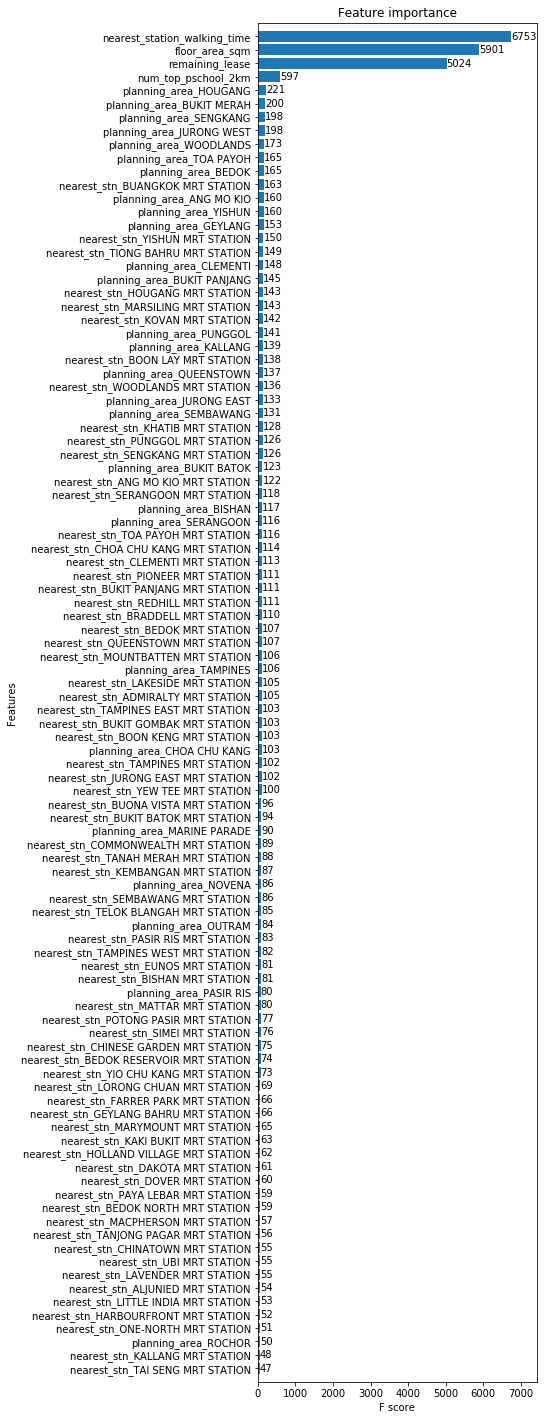

In [110]:
fig, ax = plt.subplots(figsize=(5, 25))
plot_importance(xg_reg,max_num_features=100,height=0.8,grid=False,ax=ax );

## Model Averaging

In [59]:
lasso_predictions = lasso.predict(X_test)
ridge_predictions = ridge.predict(X_test)
xg_reg_predictions = xg_reg.predict(X_test)

len(lasso_predictions),len(ridge_predictions),len(xg_reg_predictions)

(8058, 8058, 8058)

In [60]:
lasso_predictions,ridge_predictions,xg_reg_predictions

(array([13.06486883, 12.52379225, 12.9466462 , ..., 13.21777262,
        12.66060227, 13.03026397]),
 array([13.06958554, 12.49650517, 12.93591369, ..., 13.2324642 ,
        12.65402866, 13.02002738]),
 array([13.061035, 12.422133, 12.942057, ..., 13.165062, 12.667097,
        13.074083], dtype=float32))

In [61]:
y_test_prediction_avg = np.exp((lasso_predictions + ridge_predictions + xg_reg_predictions) / 3)

In [62]:
print(sklearn.metrics.r2_score(np.exp(y_test),y_test_prediction_avg))

0.9206500231890882


In [63]:
listings['predictions_avg'] = (listings['lasso_predictions']+listings['ridge_predictions']+listings['xgreg_predictions'])/3
print("R2 Score for predictions_avg on listings = ",sklearn.metrics.r2_score(listings['price'],listings['predictions_avg']))

R2 Score for predictions_avg on listings =  0.7820620799311844


In [64]:
print(len(listings['lasso_predictions']))
print(len(listings['ridge_predictions']))
print(len(listings['xgreg_predictions']))
print(len(listings['price']))

8694
8694
8694
8694


In [71]:
# import pickle
# ridgefile = 'ridge.sav'
# pickle.dump(ridge, open(ridgefile, 'wb'))

# load the model from disk
# loaded_model = joblib.load(filename)
# result = loaded_model.score(X_test, Y_test)
# print(result)

In [73]:
ridge_model = pickle.load(open('C:/Users/swoo/Dropbox/DSI/Capstone/ridge.sav','rb'))
result = ridge_model.predict(X_test)
print(result)

[13.06958554 12.49650517 12.93591369 ... 13.2324642  12.65402866
 13.02002738]


RidgeCV(alphas=array([1.00000e-02, 1.52642e-02, 2.32995e-02, 3.55648e-02, 5.42868e-02,
       8.28643e-02, 1.26486e-01, 1.93070e-01, 2.94705e-01, 4.49843e-01,
       6.86649e-01, 1.04811e+00, 1.59986e+00, 2.44205e+00, 3.72759e+00,
       5.68987e+00, 8.68511e+00, 1.32571e+01, 2.02359e+01, 3.08884e+01,
     ..., 7.90604e+05, 1.20679e+06,
       1.84207e+06, 2.81177e+06, 4.29193e+06, 6.55129e+06, 1.00000e+07]),
    cv=10, fit_intercept=True, gcv_mode=None, normalize=False,
    scoring=None, store_cv_values=False)

In [65]:
listings.head()

,Unnamed: 0,address,url,beds,baths,floor_area_sqm,price_psf,subline,nearest_mrt,amenities,...,nearest_stn_latitude,nearest_stn_longitude,nearest_station_walking_time,nearest_station_walking_distance,planning_area,num_top_pschool_2km,lasso_predictions,ridge_predictions,xgreg_predictions,predictions_avg
0,0,412 Bedok North Avenue 2,/singapore/sale/property/412-bedok-north-avenu...,2 Beds,2 Baths,66.982534,['S$436.89 psf'],HDB 3 Rooms,[],['Renovated'],...,1.323980,103.929959,669.0,929.0,BEDOK,0.0,297189.432816,300916.081218,305357.96875,301154.494261
1,2,305 Clementi Avenue 4,/singapore/sale/property/305-clementi-avenue-4...,2 Beds,2 Baths,81.939799,['S$405.90 psf'],HDB 3 Rooms,[],['Corner Unit'],...,1.314954,103.765317,711.0,987.0,CLEMENTI,0.0,360477.162213,362978.779634,332804.06250,352086.668116
2,3,623 Ang Mo Kio Avenue 9,/singapore/sale/property/623-ang-mo-kio-avenue...,2 Beds,2 Baths,81.939799,['S$451.25 psf'],HDB 3 Rooms,['Yio Chu Kang MRT'],"['High Floor', 'Corner Unit']",...,1.381756,103.844944,566.0,785.0,ANG MO KIO,0.0,328117.890520,319807.013793,316672.28125,321532.395188
3,4,555 Jurong West Street 42,/singapore/sale/property/555-jurong-west-stree...,3 Beds,3 Baths,134.057971,['S$296.60 psf'],HDB 5 Rooms,[],"['Mid Floor', 'Corner Unit']",...,1.344259,103.720980,1042.0,1447.0,JURONG WEST,0.0,455851.811919,461313.822810,417914.93750,445026.857409
4,5,22 Sin Ming Road,/singapore/sale/property/22-sin-ming-road-hdb-...,6 Beds,4 Baths,135.916016,['S$362.27 psf'],HDB 3 Rooms,[],['High Floor'],...,1.354416,103.832898,822.0,1140.0,BISHAN,1.0,627495.579449,592333.776264,512084.06250,577304.472737


# Research Resources

In [66]:
# listings.to_csv('predictions.csv')

In [67]:
# https://www.99.co/blog/singapore/hdb-resale-market-predictions-2019/